# Данные по теннисным матчам WTA 1969-2016

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 9)


fields = ['surface', 'winner_id', 'loser_id', 'winner_name', 'loser_name', 'winner_hand',
          'loser_hand','winner_ht', 'loser_ht', 'winner_ioc', 'loser_ioc', 'winner_age', 'loser_age']
df = pd.read_csv('wta_matches_1969.csv', usecols=fields)
df['year'] = 1969
for i in xrange(1970, 2017):
    fn = 'wta_matches_{0:d}.csv'.format(i)
    df_ = pd.read_csv(fn, usecols=fields)
    df_['year'] = i
    df = pd.concat([df, df_], ignore_index=True)
df.head(10)

,surface,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,year
0,Grass,200190,Billie Jean King,R,NaN,USA,NaN,200191,Frances Luff,U,NaN,AUS,NaN,1969
1,Grass,200150,Evonne Cawley,R,NaN,AUS,NaN,200192,Helen Kayser,U,NaN,AUS,NaN,1969
2,Grass,200168,Karen Krantzcke,R,NaN,AUS,NaN,200155,Lexie Kenny,U,NaN,AUS,NaN,1969
3,Grass,200149,Helen Sheedy,U,NaN,AUS,NaN,200165,Lany Kaligis,U,NaN,INA,NaN,1969
4,Grass,200193,Ann Jones,L,NaN,GBR,NaN,200166,Patricia Edwards,U,NaN,AUS,NaN,1969
5,Grass,200145,Kerry Harris,U,NaN,AUS,NaN,200179,Barbara Hawcroft,U,NaN,AUS,NaN,1969
6,Grass,200185,Lesley Hunt,U,NaN,AUS,NaN,200161,Janine Whyte,U,NaN,AUS,NaN,1969
7,Grass,200129,Lesley Bowrey,R,NaN,AUS,NaN,200141,Wendy Gilchrist,L,NaN,AUS,NaN,1969
8,Grass,200194,Francoise Durr,R,NaN,FRA,NaN,200195,H Rush,U,NaN,AUS,NaN,1969
9,Grass,200184,Helen Cawley,U,NaN,AUS,NaN,200160,Judy Dalton,U,NaN,AUS,NaN,1969


### Гипотеза о том, что правше сложнее играть с левшой:

In [2]:
RWinnerVsR = df[(df.winner_hand=='R') & (df.loser_hand=='R')][['winner_id']]\
.groupby(['winner_id']).agg({'winner_id':['count']})
RWinnerVsR.columns = RWinnerVsR.columns.droplevel(0)

RLoserVsR = df[(df.loser_hand=='R') & (df.winner_hand=='R')][['loser_id']]\
.groupby(['loser_id']).agg({'loser_id':['count']})
RLoserVsR.columns = RLoserVsR.columns.droplevel(0)

RWinnerVsL = df[(df.winner_hand=='R') & (df.loser_hand=='L')][['winner_id']]\
.groupby(['winner_id']).agg({'winner_id':['count']})
RWinnerVsL.columns = RWinnerVsL.columns.droplevel(0)

RLoserVsL = df[(df.loser_hand=='R') & (df.winner_hand=='L')][['loser_id']]\
.groupby(['loser_id']).agg({'loser_id':['count']})
RLoserVsL.columns = RLoserVsL.columns.droplevel(0)

df2 = pd.merge(RWinnerVsR, RLoserVsR, left_index=True, right_index=True, suffixes=['_winVsR', '_loseVsR'])

df2 = pd.merge(df2, RWinnerVsL, left_index=True, right_index=True)
df2 = df2.rename(columns={'count': 'count_winVsL'})

df2 = pd.merge(df2, RLoserVsL, left_index=True, right_index=True)
df2 = df2.rename(columns={'count': 'count_loseVsL'})

df2['count_VsR'] = df2['count_winVsR'] + df2['count_loseVsR']
df2['count_VsL'] = df2['count_winVsL'] + df2['count_loseVsL']
df2['winVsR %'] = 100 * df2['count_winVsR'] / df2['count_VsR']
df2['winVsL %'] = 100 * df2['count_winVsL'] / df2['count_VsL']
df2['Left-hander is a more difficult opponent'] = df2['winVsL %'] < df2['winVsR %']

print 'Left-hander is a more difficult opponent for {0:d} players.'.format(
    df2[df2['Left-hander is a more difficult opponent']==True].shape[0])
print 'Right-hander is a more difficult opponent for {0:d} players.'.format(
    df2[df2['Left-hander is a more difficult opponent']==False].shape[0])

Left-hander is a more difficult opponent for 234 players.
Right-hander is a more difficult opponent for 253 players.


- Вывод: похоже "леворукость" не преимущество :)

### Гипотеза о том, что рост в теннисе - преимущество

Побед при превосходстве над соперноком в росте: 10851.
Побед при превосходстве сопернока в росте: 9183.


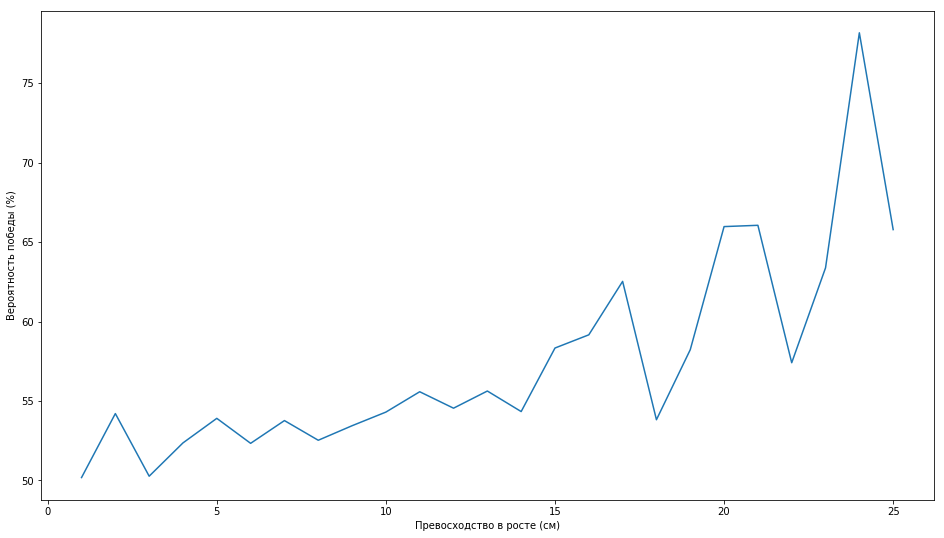

In [3]:
s = df['winner_ht'] - df['loser_ht']
s = s[~np.isnan(s)]
print 'Побед при превосходстве над соперноком в росте: {0:d}.'.format(s[(s > 0)].shape[0])
print 'Побед при превосходстве сопернока в росте: {0:d}.'.format(s[(s < 0)].shape[0])
s = s.groupby(by=lambda i: int(s[i])).count()
s = s[(s > 10)]
theTallerWon = s.loc[s.index[s.index > 0]]
theTallerLost = s.loc[s.index[s.index < 0]].rename(lambda i: -i)
theTallerWon = theTallerWon.loc[theTallerLost.index]
theTallerLost = theTallerLost.loc[theTallerWon.index]
games = theTallerLost + theTallerWon
data = theTallerWon / games
plt.plot(data.index, 100*data.values)
plt.xlabel(u'Превосходство в росте (см)')
plt.ylabel(u'Вероятность победы (%)');

- Гипотеза скорее верна

### Соберем данные по игрокам

In [4]:
winners = df[['winner_id', 'winner_name', 'winner_ioc']].rename(columns={'winner_id':'player_id', 'winner_name':'name', 'winner_ioc':'ioc'})
losers = df[['loser_id', 'loser_name', 'loser_ioc']].rename(columns={'loser_id':'player_id', 'loser_name':'name', 'loser_ioc':'ioc'})
df3 = pd.concat([winners, losers])
df3 = df3.drop_duplicates()
won = winners[['player_id', 'ioc']].groupby('player_id', as_index=False).count().rename(columns={'ioc':'won'})
lost = losers[['player_id', 'ioc']].groupby('player_id', as_index=False).count().rename(columns={'ioc':'lost'})
df4 = pd.merge(won, lost, on=['player_id'], how='outer')
df4 = df4.fillna(0)
df4 = pd.merge(df4, df3, on='player_id', how='left')
df4['games'] = df4['won'] + df4['lost']
df4['won %'] = 100 * df4['won'] / df4['games']
df4['first_year'] = np.nan
df4['last_year'] = np.nan
for plr_id in df4.player_id:
    if df[df.winner_id==plr_id].empty:
        first_year = df[df.loser_id==plr_id].year.min()
        last_year = df[df.loser_id==plr_id].year.max()
    elif df[df.loser_id==plr_id].empty:
        first_year = df[df.winner_id==plr_id].year.min()
        last_year = df[df.winner_id==plr_id].year.max()
    else:
        first_year = min(df[df.winner_id==plr_id].year.min(), df[df.loser_id==plr_id].year.min())
        last_year = max(df[df.winner_id==plr_id].year.max(), df[df.loser_id==plr_id].year.max())
    df4.loc[df4.player_id==plr_id, 'first_year'] = first_year
    df4.loc[df4.player_id==plr_id, 'last_year'] = last_year
df4.head(10)

,player_id,won,lost,name,ioc,games,won %,first_year,last_year
0,200001,534.0,131.0,Martina Hingis,SUI,665.0,80.300752,1994.0,2015.0
1,200002,126.0,148.0,Mirjana Lucic,CRO,274.0,45.985401,1996.0,2016.0
2,200003,463.0,104.0,Justine Henin,BEL,567.0,81.657848,1999.0,2011.0
3,200004,38.0,49.0,Kerry Anne Guse,AUS,87.0,43.678161,1988.0,2000.0
4,200005,45.0,80.0,Jolene Watanabe Giltz,USA,125.0,36.000000,1991.0,2000.0
5,200006,190.0,183.0,Karina Habsudova,SVK,373.0,50.938338,1990.0,2001.0
6,200007,138.0,157.0,Silvija Talaja,CRO,295.0,46.779661,1993.0,2005.0
7,200008,196.0,185.0,Alicia Molik,AUS,381.0,51.443570,1996.0,2011.0
8,200009,326.0,295.0,Tamarine Tanasugarn,THA,621.0,52.495974,1993.0,2015.0
9,200010,178.0,228.0,Rita Grande,ITA,406.0,43.842365,1991.0,2005.0


### Распределение игроков по странам

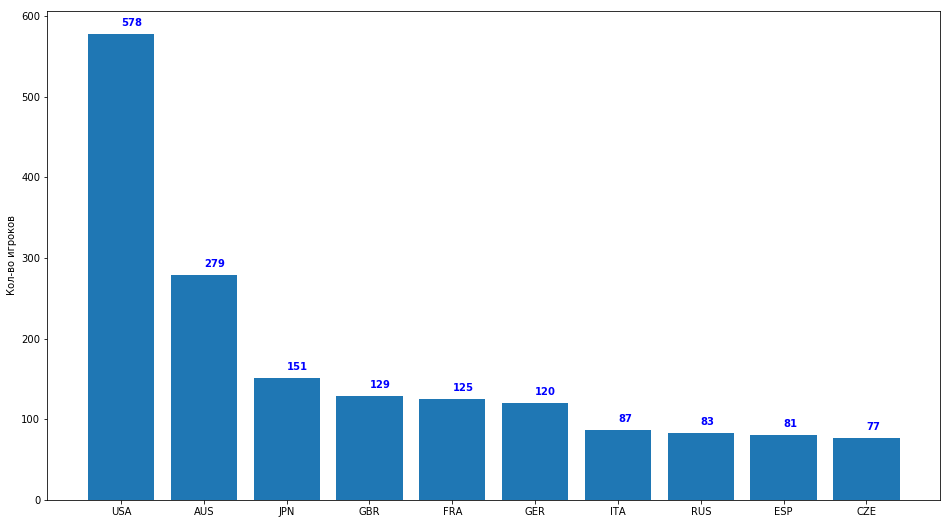

In [5]:
data = df4[['ioc','player_id']].groupby('ioc', as_index=False).count().sort_values(['player_id', 'ioc'], ascending=[False, True])
n = 10
y_pos = np.arange(n)
y = data['player_id'][:n]
plt.bar(y_pos, y)
plt.ylabel(u'Кол-во игроков')
for i, v in enumerate(y):
    plt.text(i, v + 10, str(v), color='blue', fontweight='bold')
plt.xticks(y_pos, data['ioc'][:n]);

- Первая 10ка: США, Австралия, Япония, Великобритания, Франция, Германия, Италия, Россия, Испания, Чехия

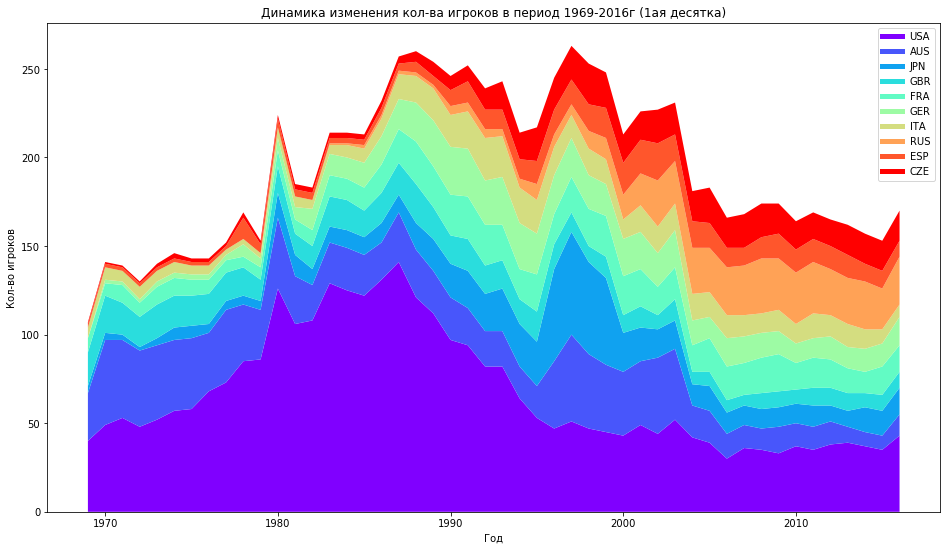

In [6]:
yy = []
colors = plt.cm.rainbow(np.linspace(0,1,n))
for ioc, c in zip(data['ioc'][:n], colors):
    plt.plot([],[],color=c, label=ioc, linewidth=5)
    y = np.zeros((48,), np.int)
    for i in xrange(48):
        year = 1969 + i
        y[i] = len(df4[(df4.ioc==ioc) & (df4.first_year<=year) & (df4.last_year>=year)])
    yy.append(y)
plt.stackplot(np.arange(1969,2017), *yy, colors=colors)
plt.xlabel(u'Год')
plt.ylabel(u'Кол-во игроков')
plt.title(u'Динамика изменения кол-ва игроков в период 1969-2016г (1ая десятка)')
plt.legend();

### Лучшие игроки из тех, что провели более 100 игр

In [8]:
data = df4[df4.games > 100].sort_values('won %', ascending=False).head(20)
data

,player_id,won,lost,name,ioc,games,won %,first_year,last_year
339,200414,903.0,108.0,Steffi Graf,GER,1011.0,89.317507,1982.0,1999.0
230,200293,1231.0,150.0,Martina Navratilova,USA,1381.0,89.138306,1973.0,2005.0
207,200259,880.0,111.0,Chris Evert,USA,991.0,88.799193,1971.0,1989.0
135,200144,106.0,14.0,Margaret Court,AUS,120.0,88.333333,1969.0,1977.0
32,200033,767.0,140.0,Serena Williams,USA,907.0,84.564498,1997.0,2016.0
564,200652,595.0,125.0,Monica Seles,USA,720.0,82.638889,1988.0,2003.0
2,200003,463.0,104.0,Justine Henin,BEL,567.0,81.657848,1999.0,2011.0
140,200150,262.0,64.0,Evonne Cawley,AUS,326.0,80.368098,1969.0,1985.0
0,200001,534.0,131.0,Martina Hingis,SUI,665.0,80.300752,1994.0,2015.0
78,200079,487.0,126.0,Kim Clijsters,BEL,613.0,79.445351,1999.0,2012.0


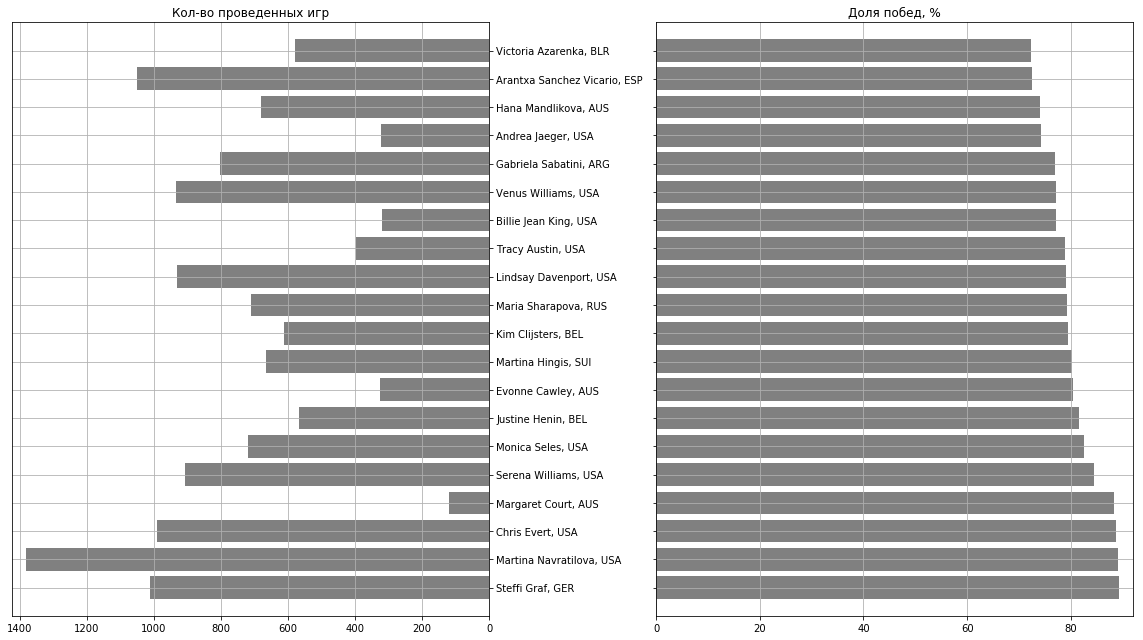

In [9]:
names = data.name.str.cat(data.ioc, sep=', ')
ngames = data.games
wins = data['won %']

y = np.arange(wins.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, ngames, color='gray')
axes[0].set(title=u'Кол-во проведенных игр')
axes[1].barh(y, wins, color='gray')
axes[1].set(title=u'Доля побед, %')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=names)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.35);

### Тройка игроков с максимальным кол-ом проведенных игр

In [10]:
df4.sort_values('games', ascending=False).head(3)

,player_id,won,lost,name,ioc,games,won %,first_year,last_year
230,200293,1231.0,150.0,Martina Navratilova,USA,1381.0,89.138306,1973.0,2005.0
16,200017,762.0,290.0,Arantxa Sanchez Vicario,ESP,1052.0,72.433460,1986.0,2002.0
339,200414,903.0,108.0,Steffi Graf,GER,1011.0,89.317507,1982.0,1999.0


### Типы покрытия корта:

In [11]:
df['surface'].drop_duplicates().dropna()

0        Grass
31        Clay
1052      Hard
2506    Carpet
Name: surface, dtype: object

In [12]:
for surface in df['surface'].drop_duplicates().dropna():
    won_on_surface = df[df.surface==surface][['surface','winner_id']].groupby('winner_id', as_index=False).count().rename(columns={'winner_id':'player_id','surface':'won_on_'+surface})
    lost_on_surface = df[df.surface==surface][['surface','loser_id']].groupby('loser_id', as_index=False).count().rename(columns={'loser_id':'player_id','surface':'lost_on_'+surface})
    on_surface = pd.merge(won_on_surface, lost_on_surface, on='player_id', how='outer')
    on_surface = on_surface.fillna(0)
    on_surface['on_'+surface] = on_surface['won_on_'+surface] + on_surface['lost_on_'+surface]
    on_surface['won_on_'+surface+' %'] = 100 * on_surface['won_on_'+surface] / on_surface['on_'+surface]
    df4 = pd.merge(df4, on_surface, on='player_id', how='left')
df4 = df4.fillna(0)
df4.head(10)

,player_id,won,lost,name,ioc,games,won %,first_year,last_year,won_on_Grass,...,on_Clay,won_on_Clay %,won_on_Hard,lost_on_Hard,on_Hard,won_on_Hard %,won_on_Carpet,lost_on_Carpet,on_Carpet,won_on_Carpet %
0,200001,534.0,131.0,Martina Hingis,SUI,665.0,80.300752,1994.0,2015.0,27.0,...,146.0,81.506849,302.0,79.0,381.0,79.265092,86.0,17.0,103.0,83.495146
1,200002,126.0,148.0,Mirjana Lucic,CRO,274.0,45.985401,1996.0,2016.0,21.0,...,84.0,57.142857,56.0,87.0,143.0,39.160839,1.0,3.0,4.0,25.000000
2,200003,463.0,104.0,Justine Henin,BEL,567.0,81.657848,1999.0,2011.0,53.0,...,153.0,85.620915,258.0,58.0,316.0,81.645570,21.0,13.0,34.0,61.764706
3,200004,38.0,49.0,Kerry Anne Guse,AUS,87.0,43.678161,1988.0,2000.0,24.0,...,4.0,0.000000,12.0,27.0,39.0,30.769231,2.0,2.0,4.0,50.000000
4,200005,45.0,80.0,Jolene Watanabe Giltz,USA,125.0,36.000000,1991.0,2000.0,3.0,...,22.0,22.727273,30.0,49.0,79.0,37.974684,7.0,7.0,14.0,50.000000
5,200006,190.0,183.0,Karina Habsudova,SVK,373.0,50.938338,1990.0,2001.0,6.0,...,132.0,58.333333,81.0,77.0,158.0,51.265823,26.0,36.0,62.0,41.935484
6,200007,138.0,157.0,Silvija Talaja,CRO,295.0,46.779661,1993.0,2005.0,11.0,...,132.0,53.030303,55.0,72.0,127.0,43.307087,2.0,9.0,11.0,18.181818
7,200008,196.0,185.0,Alicia Molik,AUS,381.0,51.443570,1996.0,2011.0,30.0,...,69.0,39.130435,138.0,110.0,248.0,55.645161,1.0,4.0,5.0,20.000000
8,200009,326.0,295.0,Tamarine Tanasugarn,THA,621.0,52.495974,1993.0,2015.0,84.0,...,70.0,25.714286,217.0,196.0,413.0,52.542373,7.0,8.0,15.0,46.666667
9,200010,178.0,228.0,Rita Grande,ITA,406.0,43.842365,1991.0,2005.0,15.0,...,102.0,40.196078,110.0,124.0,234.0,47.008547,12.0,19.0,31.0,38.709677


In [13]:
df4['preferred_surface'] = df4[['won_on_Grass %','won_on_Clay %','won_on_Hard %','won_on_Carpet %']].idxmax(axis=1)

### Топ 20 из тех, что лучше играет на траве

In [14]:
df4[(df4.on_Grass>20) & (df4.preferred_surface=='won_on_Grass %')][['name','ioc','games','won %','on_Grass','won_on_Grass %']].sort_values('won_on_Grass %', ascending=False).head(20)

,name,ioc,games,won %,on_Grass,won_on_Grass %
135,Margaret Court,AUS,120.0,88.333333,75.0,92.000000
32,Serena Williams,USA,907.0,84.564498,107.0,88.785047
140,Evonne Cawley,AUS,326.0,80.368098,158.0,82.911392
659,Venus Williams,USA,933.0,77.063237,104.0,82.692308
456,Jana Novotna,CZE,734.0,71.798365,95.0,78.947368
1319,Madison Keys,USA,217.0,61.290323,32.0,78.125000
286,Pam Shriver,USA,861.0,69.337979,244.0,76.229508
76,Jennifer Capriati,USA,583.0,70.497427,61.0,75.409836
329,Zina Garrison,USA,853.0,68.581477,164.0,75.000000
152,Kerry Reid,AUS,297.0,69.360269,119.0,74.789916


### Топ 20 из тех, что лучше играет на грунтовом покрытии

In [15]:
df4[(df4.on_Clay>20) & (df4.preferred_surface=='won_on_Clay %')][['name','ioc','games','won %','on_Clay','won_on_Clay %']].sort_values('won_on_Clay %', ascending=False).head(20)

,name,ioc,games,won %,on_Clay,won_on_Clay %
207,Chris Evert,USA,991.0,88.799193,294.0,93.877551
339,Steffi Graf,GER,1011.0,89.317507,304.0,90.131579
2,Justine Henin,BEL,567.0,81.657848,153.0,85.620915
564,Monica Seles,USA,720.0,82.638889,171.0,84.210526
1076,Maria Sharapova,RUS,711.0,79.184248,160.0,82.500000
652,Renee Reid,AUS,49.0,67.346939,22.0,81.818182
322,Tracy Austin,USA,398.0,78.894472,63.0,80.952381
488,Gabriela Sabatini,ARG,804.0,76.990050,248.0,79.838710
306,Andrea Jaeger,USA,323.0,74.303406,94.0,77.659574
16,Arantxa Sanchez Vicario,ESP,1052.0,72.433460,460.0,76.739130


### Топ 20 из тех, что лучше играет на твердом покрытии

In [16]:
df4[(df4.on_Hard>20) & (df4.preferred_surface=='won_on_Hard %')][['name','ioc','games','won %','on_Hard','won_on_Hard %']].sort_values('won_on_Hard %', ascending=False).head(20)

,name,ioc,games,won %,on_Hard,won_on_Hard %
2418,Yamile Fors Guerra,CUB,49.0,59.183673,22.0,86.363636
160,Billie Jean King,USA,319.0,77.115987,45.0,84.444444
1969,Petra Russegger,AUT,31.0,83.870968,31.0,83.870968
78,Kim Clijsters,BEL,613.0,79.445351,405.0,81.481481
127,Lindsay Davenport,USA,931.0,79.162191,597.0,80.402010
1644,Keiko Nagatomi,JPN,22.0,77.272727,22.0,77.272727
1177,Victoria Azarenka,BLR,580.0,72.413793,394.0,74.619289
326,Manuela Maleeva Fragniere,SUI,664.0,71.837349,205.0,73.170732
1214,Caroline Wozniacki,DEN,697.0,70.157819,497.0,71.629779
1192,Agnieszka Radwanska,POL,723.0,69.847856,505.0,70.891089


### Топ 20 из тех, что лучше играет на ковровом покрытии

In [17]:
df4[(df4.on_Carpet>20) & (df4.preferred_surface=='won_on_Carpet %')][['name','ioc','games','won %','on_Carpet','won_on_Carpet %']].sort_values('won_on_Carpet %', ascending=False).head(20)

,name,ioc,games,won %,on_Carpet,won_on_Carpet %
230,Martina Navratilova,USA,1381.0,89.138306,494.0,91.295547
0,Martina Hingis,SUI,665.0,80.300752,103.0,83.495146
679,Anastasia Myskina,RUS,399.0,63.659148,44.0,77.272727
274,Hana Mandlikova,AUS,682.0,74.046921,165.0,74.545455
85,Magdalena Maleeva,BUL,690.0,58.985507,171.0,64.912281
531,Kimiko Date Krumm,JPN,463.0,57.451404,39.0,61.538462
79,Dominique Monami,BEL,390.0,57.692308,79.0,60.759494
604,Elena Makarova,RUS,153.0,48.366013,33.0,60.606061
94,Linda Wild,USA,280.0,48.214286,45.0,60.000000
19,Lisa Raymond,USA,609.0,54.187192,94.0,59.574468


### Влияние возраста на успех в игре

In [18]:
df5 = df[['winner_age', 'loser_age']].dropna().astype(int)
df5 = pd.merge(
    df5.groupby('winner_age', as_index=False).count().rename(columns={'winner_age':'age','loser_age':'won'}),
    df5.groupby('loser_age', as_index=False).count().rename(columns={'loser_age':'age','winner_age':'lost'}),
    on='age'
)
df5['games'] = df5['won'] + df5['lost']
df5['won %'] = 100 * df5['won'] / df5['games']
data = df5[df5.games>50]
data

,age,won,lost,games,won %
1,14,291,358,649,44.838213
2,15,837,976,1813,46.166575
3,16,1964,2003,3967,49.508445
4,17,3767,3650,7417,50.788729
5,18,6135,6032,12167,50.423276
6,19,7347,7699,15046,48.830254
7,20,8279,8471,16750,49.426866
8,21,8472,8856,17328,48.891967
9,22,8657,8488,17145,50.492855
10,23,8127,8022,16149,50.325098


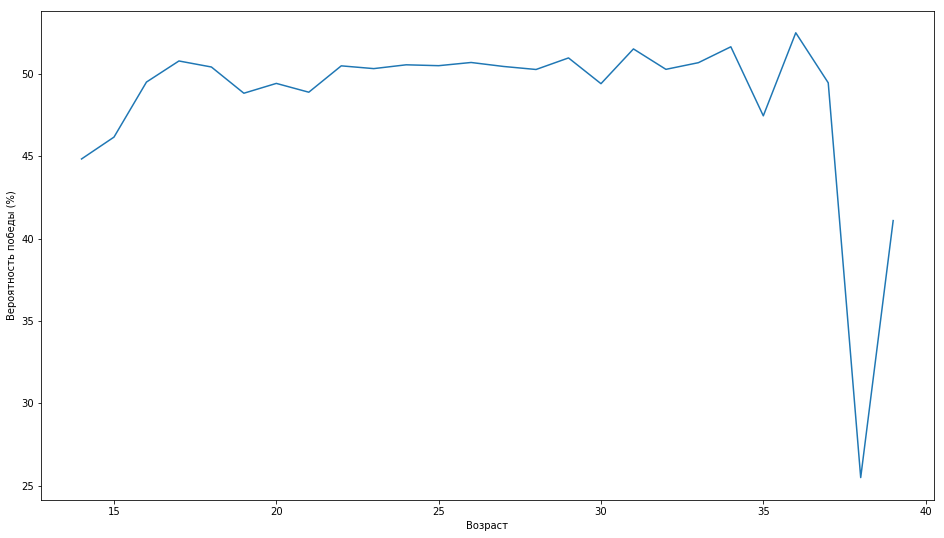

In [19]:
plt.plot(data.age, data['won %'])
plt.xlabel(u'Возраст')
plt.ylabel(u'Вероятность победы (%)');

#### - В данных "старше 37 лет" наблюдается заметное отклонение от 50% в сторону проигрыша, но там и самих данных маловато - возможно погрешность. До 16 лет также есть небольшой спад - полагаю это начинающие игроки набирают опыт. В целом же возраст не влияет на исход игры, точнее спротсмены знают когда надо уходить и "вовремя" завершают карьеру.